**Part 1- Neural Network**

In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt
import keras.datasets.fashion_mnist as fashion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


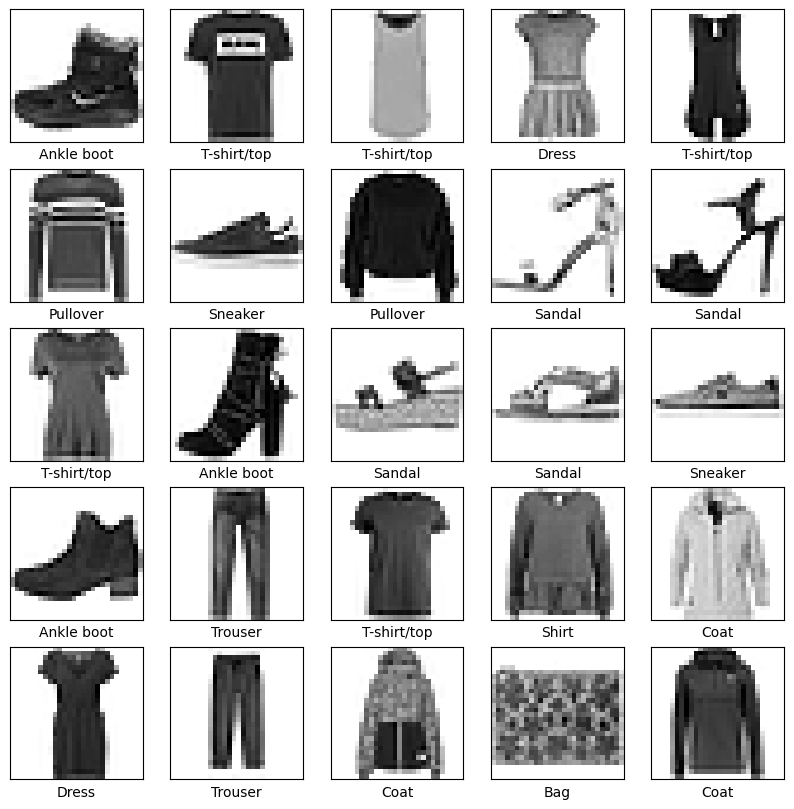

(60000, 28, 28)
(10000, 28, 28)
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot 4 images as gray scale
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

print(X_train.shape)
print(X_test.shape)
print(class_names)

In [4]:
# flatten 28*28 images to a 784 vector for each image
IMG_HEIGHT=28
IMG_WIDTH= 28
channels =1

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
#Create the model here
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)),
                             tf.keras.layers.Dense(128, activation= 'relu'),
                             tf.keras.layers.Dense(10, activation= 'softmax')])
model.compile(optimizer='adam', loss= loss_fn, metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Train the model here
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9048 - loss: 0.2625 - val_accuracy: 0.8832 - val_loss: 0.3211
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9055 - loss: 0.2556 - val_accuracy: 0.8861 - val_loss: 0.3182
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9115 - loss: 0.2451 - val_accuracy: 0.8827 - val_loss: 0.3253
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9154 - loss: 0.2344 - val_accuracy: 0.8861 - val_loss: 0.3199
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9151 - loss: 0.2332 - val_accuracy: 0.8878 - val_loss: 0.3141
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9165 - loss: 0.2273 - val_accuracy: 0.8824 - val_loss: 0.3318
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9223 - loss: 0.2132 - val_accuracy: 0.8893 - val_loss: 0.3078
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9206 - loss: 0.2151 - val_accuracy: 0.

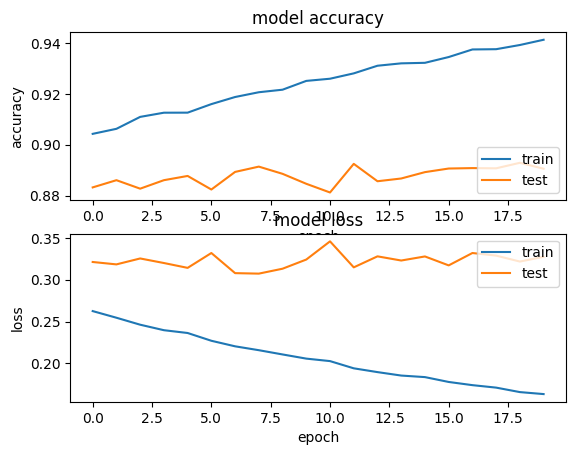

In [10]:
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

In [ ]:
# Write your understanding about this model here

## Write your understanding about this model here

First, the required libraries were imported. Then, the desired dataset, which consists of images and their corresponding labels, was loaded. The dataset was split into training and testing sets, and some samples were displayed to provide a visual insight into the data.

Next, the image size was determined, and grayscale images with a single channel were used. The data was normalized to improve compatibility with neural network models and ensure faster, more stable training.

After preprocessing, the model was defined using a Sequential architecture. Key design choices included:

ReLU activation in hidden layers, which replaces negative values with zero and helps prevent vanishing gradients.

Softmax activation in the output layer, which converts logits into probabilities for multi-class classification.

The Adam optimizer, which efficiently updates model weights to minimize the loss function, guiding the network to learn correctly.

Sparse categorical cross-entropy as the loss function, which measures how far off the model’s predictions are from the true labels.

Accuracy as a metric, to track the model’s performance during both training and validation.

After training the initial model, I experimented with different numbers of epochs: [10, 20, 50, 100, 150, 200]. It was observed that, in general, as the number of epochs increased, the model’s validation accuracy initially improved. However, after a certain point, overfitting occurred, indicated by increasing validation loss and decreasing validation accuracy.

Here are the results for different epochs:

10 Epochs
<img src="epoch10.png" alt="10 epochs" width="300"/>

20 Epochs
<img src="epoch20.png" alt="20 epochs" width="300"/>

50 Epochs
<img src="epoch50.png" alt="50 epochs" width="300"/>

100 Epochs
<img src="epoch100.png" alt="100 epochs" width="300"/>

150 Epochs
<img src="epoch150.png" alt="150 epochs" width="300"/>

200 Epochs
<img src="epoch200.png" alt="200 epochs" width="300"/>

This analysis shows that the number of epochs is a critical hyperparameter. Optimizing it is essential not only to maximize accuracy and minimize loss but also to prevent overfitting, ensuring that the model generalizes well to unseen data.

**Part 2- Image Processing**

Load the Flower photo dataset from tensorflow repository

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)

data_dir = pathlib.Path(data_dir)
data_dir = data_dir / "flower_photos"

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


*a) How many images we can find in this dataset?*




In [12]:
image_count = len(list(data_dir.glob('*/*.jpg')))  #This will count all the file with extension of jpg- You have to modify this part
print(image_count)
print(data_dir)


3670
/root/.keras/datasets/flower_photos/flower_photos


*b) The list of subfolders are:*
*   daisy
*   dandelion
*   roses
*   sunflowers
*   tulips

You can look into any of the subfolders to see images stored over there. You can look into the folder using: data_dir.glob('tulips/*')
For this part use Pillow (PIL) to show at least one flower from each subfolder


Number of tulip images: 799


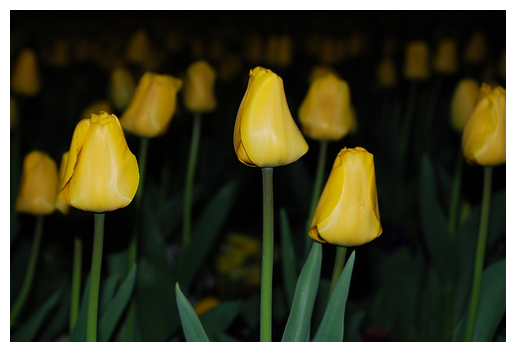

In [15]:
# tulips = list()    #This line stores the list of data in subfolder
# PIL.Image.open(str(tulips[5]))              # Use Pillow here to plot the image

from pathlib import Path
from PIL import Image

# Path to the tulips folder
tulips_dir = data_dir / "tulips"

# Get a list of all .jpg images in the tulips folder
tulips = list(tulips_dir.glob('*.jpg'))

# Get the numbers of tulip images
num_tulips = len(tulips)

# Print the numbers of tulip images
print("Number of tulip images:", num_tulips)

# Now you can open an image
img = Image.open(str(tulips[75]))  # This will work if there are at least 6 images

# Display it inline
plt.imshow(img)
plt.axis('off')  # turn off axis
plt.show()

*c) Use Keras to resize all the images into same dimension 180x180*

In [16]:
batch_size = 32
img_height = 180
img_width = 180

In [17]:
# Convert all the images in data_dir folder into 180x180 using tf.kera.utils.image_dataset_from_directory
# Modify following code
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,               # path to the main dataset folder
    labels='inferred',      # automatically infer labels from folder names
    label_mode='int',       # use integer labels
    image_size=(180, 180),  # resize all images to 180x180
    batch_size=32,          # number of images per batch
    shuffle=True,           # shuffle dataset
    seed=123,               # for reproducibility
    validation_split=0.2,   # reserve 20% for validation
    subset='training'       # this is the training subset
)

# Check class names
print("Classes:", train_ds.class_names)

# Inspect a batch
for images, labels in train_ds.take(1):
    print("Batch image shape:", images.shape)
    print("Batch labels:", labels)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Batch image shape: (32, 180, 180, 3)
Batch labels: tf.Tensor([2 1 4 3 1 2 1 2 4 1 4 4 3 4 1 2 0 4 1 1 1 4 3 2 3 1 4 2 2 3 4 3], shape=(32,), dtype=int32)


In [18]:
# Use the same strategy to create validation data, this time from validation subset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=123,
    validation_split=0.2,  # same split as above
    subset='validation'     # this is the validation subset
)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


d) *You can use* `train_ds.class_names` *command to get the list of labels. Write a code to randomly show 9 images from training data while printing their label on top of the image.*

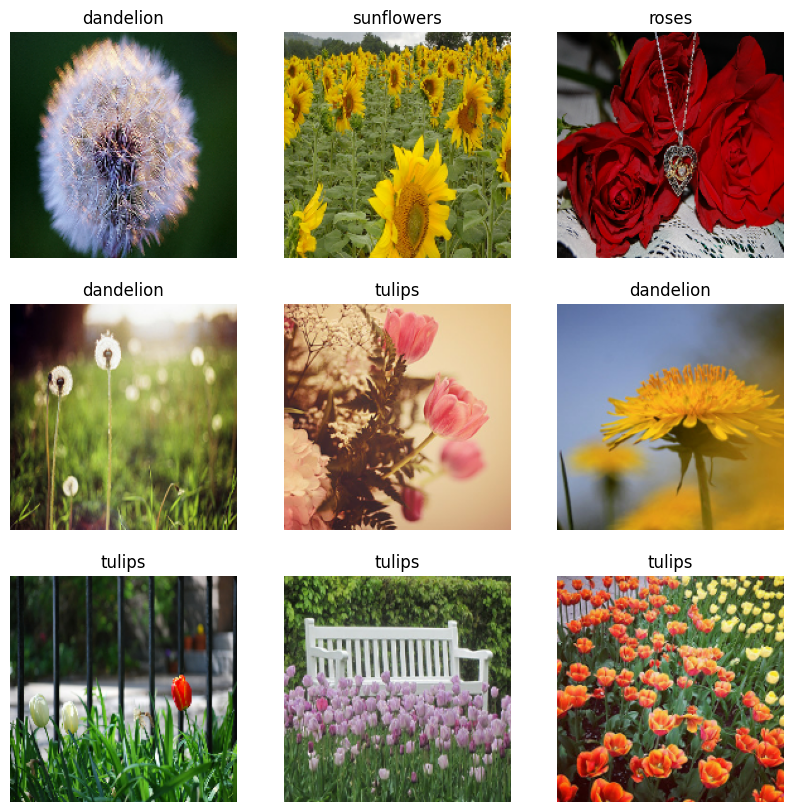

In [27]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))

# Take one batch from the dataset
for images, labels in train_ds.take(1):
    # Choose 9 random indices from the batch
    indices = np.random.choice(images.shape[0], 9, replace=False)
    for i, idx in enumerate(indices):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[idx].numpy().astype("uint8"))  # Convert tensor to numpy for plt
        plt.title(class_names[labels[idx]])
        plt.axis("off")
plt.show()

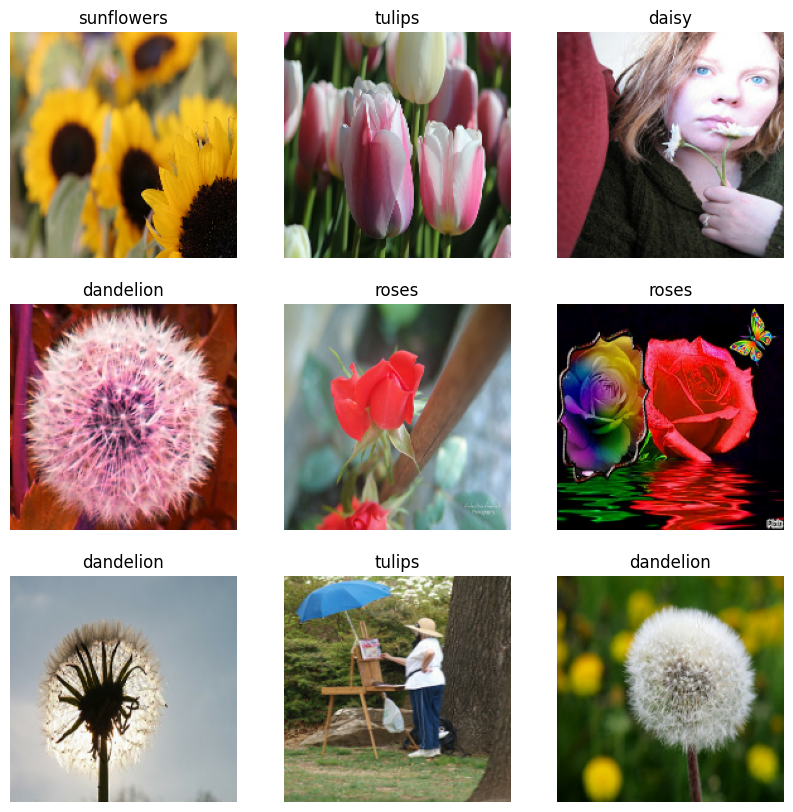

In [29]:
# Here, I used the validation images to show 9 of them randomly

class_names = val_ds.class_names

plt.figure(figsize=(10, 10))

# Take one batch from the dataset
for images, labels in val_ds.take(1):
    # Choose 9 random indices from the batch
    indices = np.random.choice(images.shape[0], 9, replace=False)
    for i, idx in enumerate(indices):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[idx].numpy().astype("uint8"))  # Convert tensor to numpy for plt
        plt.title(class_names[labels[idx]])
        plt.axis("off")
plt.show()

In [ ]:
# Please carefully review the images. What are some barriers that you can see in images for having a proper classification?

The first challenge I noticed in the dataset is the skill level of the photographers. Some images are not focused on the intended object; instead, the focus may be on other elements such as buildings, benches, or people. In other cases, the camera distance varies significantly — some shots are too far, while others are extremely close — which can negatively impact training and validation, and consequently reduce accuracy while increasing loss on test images.

Another factor is the lighting conditions when the photos were taken. Sunlight affects how well the camera captures details, which can influence the quality of the images. Additionally, some images suffer from blurriness, either due to portrait mode on smartphones or autofocus on professional cameras, making the target objects unclear.

The variety of objects within each image is also an issue. Images containing multiple objects can make the training and validation process more difficult, often resulting in lower model accuracy.

Finally, there are labeling errors. For example, one randomly selected validation image was labeled as a tulip, but it actually contained a human who is painting under an umbrella. If such mislabeled images are included in the test set, the model may incorrectly predict them as tulips, increasing false positives. In these cases, hybrid supervision can be highly beneficial — an expert can review the dataset and model outputs to improve overall accuracy and precision.

*e* - *Now, we want to use preprocessing package in Keras to apply different filters to the image. Apply the following procedures to image data:*
- *Rescale the image by dividing by 255*
- *Shear the image 20%*
- *Zoom the image 20%*
- *Horizontally flip the images*

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,         # Rescale pixel values to [0,1]
    shear_range=0.2,        # Apply shear transformation up to 20%
    zoom_range=0.2,         # Apply random zoom up to 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    validation_split=0.2    # Optional: reserve 20% for validation
)  # Modify this line of code

training_set = train_datagen.flow_from_directory(
    '/root/.keras/datasets/flower_photos/flower_photos',
    target_size=(180, 180), # Resize images to 180x180
    batch_size=32,
    class_mode='categorical', # For multi-class classification
    subset='training',        # Subset for training
    shuffle=True
)   # Modify this line of code

# Optional: create validation set
validation_set = train_datagen.flow_from_directory(
    '/root/.keras/datasets/flower_photos/flower_photos',
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='validation',     # Subset for validation
    shuffle=True
)



Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


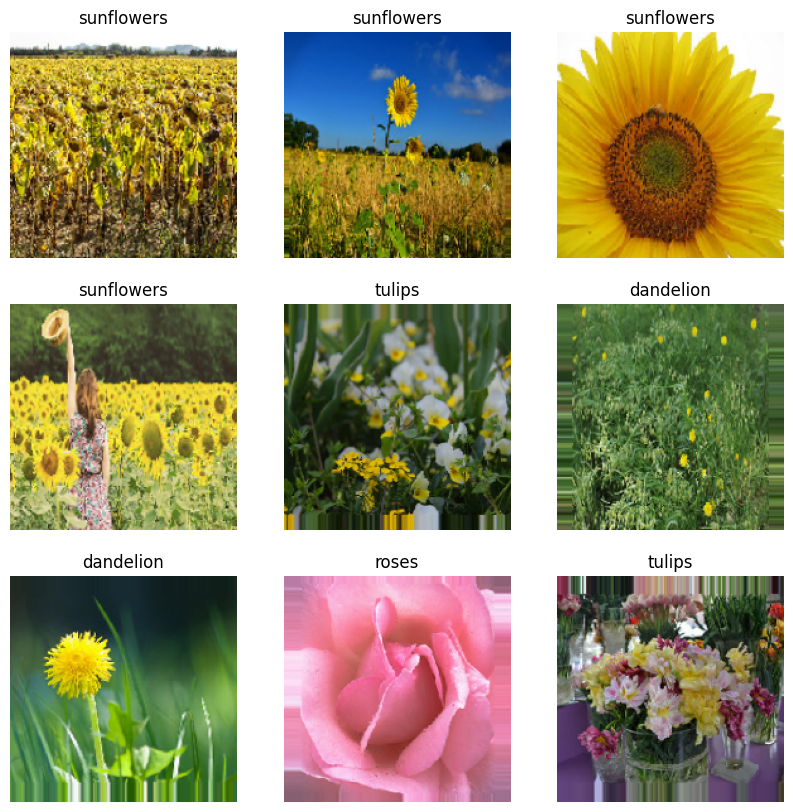

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of images and labels from training set
images, labels = next(iter(training_set))

# Get class names
class_names = list(training_set.class_indices.keys())

plt.figure(figsize=(10, 10))

# Display 9 images with their class names
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])  # Images are already rescaled to [0,1]
    plt.title(class_names[np.argmax(labels[i])])  # Convert one-hot label to class name
    plt.axis("off")

plt.show()




**Part 3- OPENCV**- Now use opencv for preprocessing. Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180.

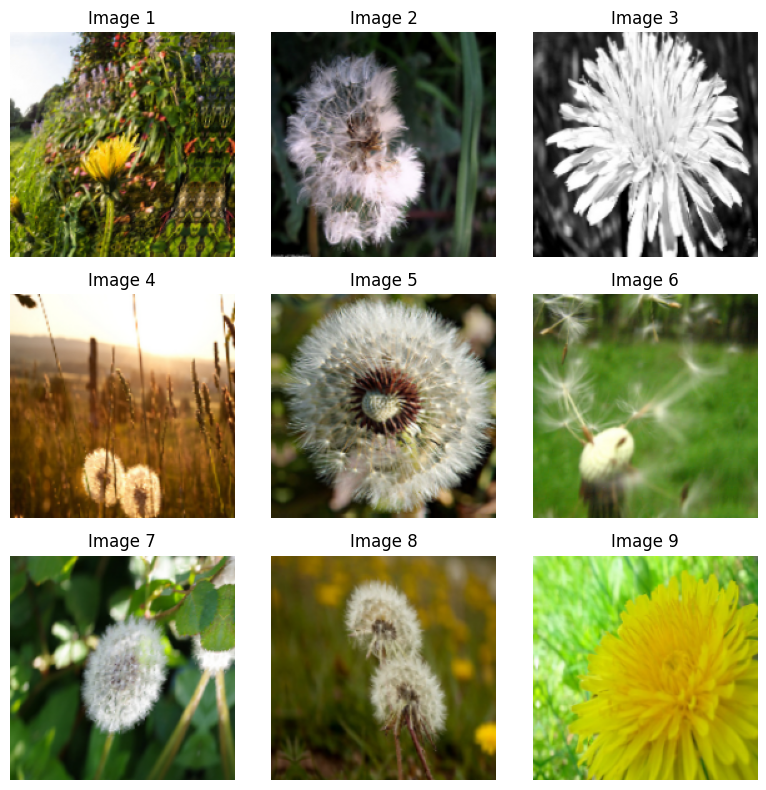

In [60]:
import cv2                                   # OpenCV for image processing (read, transform, display)
import numpy as np                           # NumPy for array and matrix operations
import matplotlib.pyplot as plt              # Matplotlib for showing images
import random                                # Random for generating random transformations
from pathlib import Path                     # Path for handling file paths easily

# Define the dataset path
data_dir = Path('/root/.keras/datasets/flower_photos/flower_photos')  # Folder containing images

# Get a list of all .jpg images inside subfolders
list_of_images = list(data_dir.glob('*/*.jpg'))   # Collect all image file paths

plt.figure(figsize=(8, 8))                      # Create a 12x12 inch figure for displaying images

# Loop over the first 9 images in the dataset
for i in range(9):                                # Repeat 9 times
    img_path = str(list_of_images[i])             # Convert Path object to string (OpenCV needs string)
    img = cv2.imread(img_path)                    # Read image using OpenCV (loads in BGR format)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    # Convert color from BGR → RGB for Matplotlib
    img = cv2.resize(img, (180, 180))             # Resize the image to 180x180 pixels

    # ---- Random Horizontal Flip ----
    if random.random() > 0.5:                     # 50% probability of flipping
        img = cv2.flip(img, 1)                    # Flip image horizontally (mirror effect)

    # ---- Random Zoom ----
    zoom_factor = 1 + random.uniform(-0.2, 0.2)   # Choose random zoom between 0.8× and 1.2×
    h, w = img.shape[:2]                          # Get image height and width
    new_h, new_w = int(h * zoom_factor), int(w * zoom_factor)  # Compute new size
    zoomed = cv2.resize(img, (new_w, new_h))      # Resize image according to zoom factor

    if zoom_factor > 1:                           # If zoomed in
        start_x = (new_w - w) // 2                # Compute x offset for cropping center
        start_y = (new_h - h) // 2                # Compute y offset for cropping center
        img = zoomed[start_y:start_y + h, start_x:start_x + w]  # Crop to original size
    else:                                         # If zoomed out
        pad_x = (w - new_w) // 2                  # Compute horizontal padding
        pad_y = (h - new_h) // 2                  # Compute vertical padding
        img = cv2.copyMakeBorder(zoomed, pad_y, pad_y, pad_x, pad_x, cv2.BORDER_REFLECT)
        # Add reflected borders to fill back to 180×180

    # ---- Random Shear ----
    shear_factor = random.uniform(-0.2, 0.2)      # Random shear factor between -0.2 and +0.2
    M = np.array([[1, shear_factor, 0],           # Build affine transformation matrix
                  [0, 1, 0]], dtype=float)
    img = cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REFLECT)
    # Apply shear transformation while reflecting borders

    # ---- Rescale ----
    img = img / 255.0                             # Normalize pixel values to range [0,1]

    # ---- Display ----
    plt.subplot(3, 3, i + 1)                      # Place each image in a 3×3 grid position
    plt.imshow(img)                               # Show the processed image
    plt.axis('off')                               # Hide axis ticks
    plt.title(f"Image {i+1}")                     # Add image number as title

plt.tight_layout()                                # Adjust layout to prevent overlap
plt.show()                                        # Display all 9 processed images




OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front.
The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale image.
`RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

Selected image: /root/.keras/datasets/flower_photos/flower_photos/sunflowers/4933822272_79af205b94.jpg
Original Image:


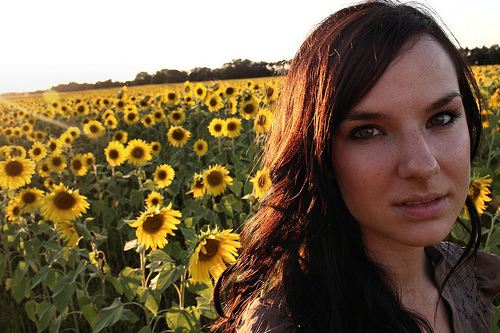

Blue Filtered Image:


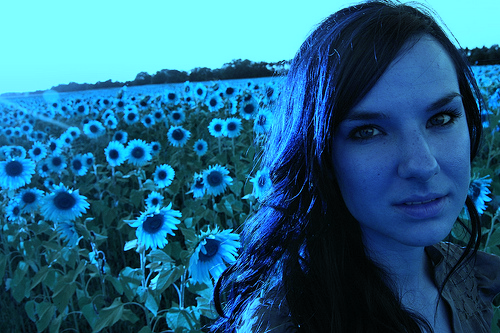

1

In [80]:
from pathlib import Path
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # This works in Google Colab

def apply_blue_sunflower_filter(image_path):

    # 1 Load the image
    img = cv2.imread(str(image_path))
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return None

    # 2 Split image into color channels (BGR in OpenCV)
    b, g, r = cv2.split(img)

    # 3 Apply the blue filter transformation
    new_b = np.clip(r * 1.2, 0, 255).astype(np.uint8)  # boost blue tones
    new_g = np.clip(g * 1.0, 0, 255).astype(np.uint8)  # keep green
    new_r = np.clip(b * 0.5, 0, 255).astype(np.uint8)  # cool down reds

    # 4 Merge modified channels
    blue_img = cv2.merge([new_b, new_g, new_r])

    # 5 Display results
    print("Original Image:")
    cv2_imshow(img)

    print("Blue Filtered Image:")
    cv2_imshow(blue_img)

    return 1


# Get all sunflower images as a list
sunflower_images = list(data_dir.glob('sunflowers/*.jpg'))

# Choose the image by index number (e.g., 34th image)
index = 34

# Ensure index is valid
if index < len(sunflower_images):
    sunflower_path = sunflower_images[index]
    print(f"Selected image: {sunflower_path}")
else:
    print(f" Index {index} is out of range! Only {len(sunflower_images)} images available.")

# Apply the filter
apply_blue_sunflower_filter(sunflower_path)




Selected tulip image: /root/.keras/datasets/flower_photos/flower_photos/tulips/4550091966_7f3e0f8802_n.jpg
Original Tulip Image:


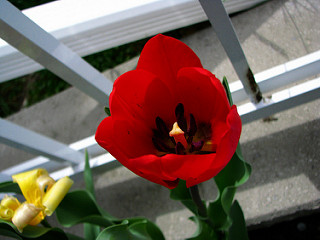

Blue Filtered Tulip Image:


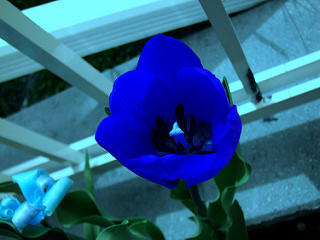

1

In [82]:
from pathlib import Path
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Works in Colab for displaying images

def apply_blue_tulip_filter(image_path):

    # 1 Load the image
    img = cv2.imread(str(image_path))
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return None

    # 2 Split image into BGR channels
    b, g, r = cv2.split(img)

    # 3 Apply blue filter transformation
    new_b = np.clip(r * 1.2, 0, 255).astype(np.uint8)  # boost blue tones using original red
    new_g = np.clip(g * 1.0, 0, 255).astype(np.uint8)  # keep green similar
    new_r = np.clip(b * 0.5, 0, 255).astype(np.uint8)  # reduce original blue intensity

    # 4 Merge the modified channels
    blue_img = cv2.merge([new_b, new_g, new_r])

    # 5 Display images
    print("Original Tulip Image:")
    cv2_imshow(img)

    print("Blue Filtered Tulip Image:")
    cv2_imshow(blue_img)

    return 1


# --- Example usage for tulips ---

# Path to the tulips folder
data_dir = Path('/root/.keras/datasets/flower_photos/flower_photos')

# Get all tulip images as a list
tulip_images = list(data_dir.glob('tulips/*.jpg'))

# Choose the image by index number (e.g., 34th image)
index = 77

# Ensure index is valid
if index < len(tulip_images):
    tulip_path = tulip_images[index]
    print(f"Selected tulip image: {tulip_path}")
else:
    print(f"Index {index} is out of range! Only {len(tulip_images)} tulip images available.")

# Apply the blue filter
apply_blue_tulip_filter(tulip_path)

Original Image:


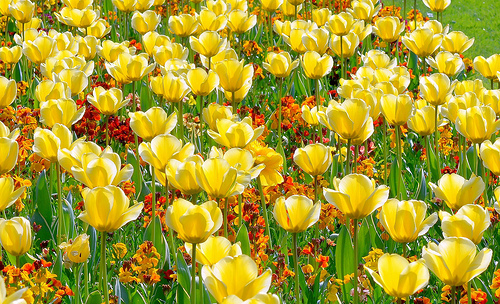

Curves Adjusted Image:


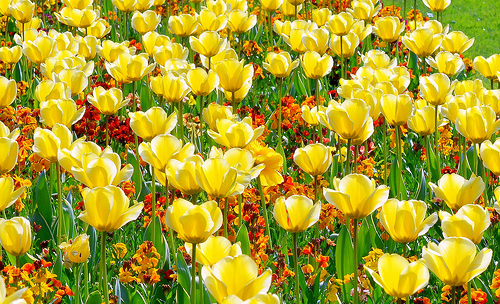

1

In [84]:
import cv2
import numpy as np
from pathlib import Path
from google.colab.patches import cv2_imshow  # Only for Colab

def apply_curves(image_path, curve_points=None):
    """
    Apply a curves adjustment to an image, similar to Photoshop.

    Parameters:
        image_path (str or Path): Path to the input image
        curve_points (list of tuples): List of (input, output) points to define the curve
                                       Values should be in [0, 255]

    Returns:
        img_curved (numpy.ndarray): Image after curve adjustment
    """
    # 1️⃣ Load the image
    img = cv2.imread(str(image_path))
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return None

    # OpenCV uses BGR format
    img_curved = np.zeros_like(img)

    # 2️⃣ Default curve if none provided (simple S-curve)
    if curve_points is None:
        curve_points = [(0, 0), (64, 50), (128, 128), (192, 205), (255, 255)]

    # 3️⃣ Generate the lookup table using linear interpolation
    x = [p[0] for p in curve_points]
    y = [p[1] for p in curve_points]
    lut = np.interp(np.arange(256), x, y).astype(np.uint8)

    # 4️⃣ Apply the LUT to each channel
    for i in range(3):  # B, G, R channels
        img_curved[:, :, i] = cv2.LUT(img[:, :, i], lut)

    # 5️⃣ Show the original and adjusted images
    print("Original Image:")
    cv2_imshow(img)
    print("Curves Adjusted Image:")
    cv2_imshow(img_curved)

    return 1


# Example usage:
data_dir = Path('/root/.keras/datasets/flower_photos/flower_photos')
tulip_path = list(data_dir.glob('tulips/*.jpg'))[10]  # Pick 11th tulip image
apply_curves(tulip_path)


## An Idea on preprocessing Computer Vision Tasks

I have developed an idea for applying filters to image datasets inspired by Adobe Photoshop. With over 20 years of experience using Photoshop, I have observed its powerful capability to apply filters layer by layer. Each layer can be toggled on or off, allowing the user to selectively apply effects, and the final desired result can be flattened onto the original image.

The core concept is to create a Python class (can be several class using different libraries such as PIL, OpenCV, Pytorch, etc.)that encapsulates several useful image preprocessing filters as functions, specifically designed for computer vision tasks. These filters can then be sequentially applied to an image dataset. Each filter individually modifies the dataset and may impact the performance of a machine learning model trained on it.

Building on this, several parameter ranges can be defined for each filter—for example, varying the brightness, contrast, blur intensity, or color shifts. By systematically applying each filter (or combination of filters) across these ranges and training the model, we can evaluate the resulting accuracy and loss. Repeating this process over multiple iterations allows us to identify the most effective sequence and parameter settings for the filters.

Ultimately, this approach can automatically optimize the preprocessing pipeline, producing a “filterized” model that maximizes performance while minimizing loss. This method is especially applicable to data-driven systems such as autonomous vehicles, drones, and robotics, where optimal preprocessing of visual data is critical. Additional enhancements, such as implementing Photoshop-like curves, adjusting sharpness, and fine-tuning brightness and contrast, can further improve the model’s robustness and accuracy.

Here is a sample minimalist code with above concept.

In [87]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
from pathlib import Path
import cv2
import random

# -----------------------------
# 1. Define a Filter Class
# -----------------------------
class ImageFilters:
    """A class that applies sequential filters to an image."""

    def __init__(self, brightness=1.0, blur=0, flip=False):
        self.brightness = brightness  # brightness factor
        self.blur = blur              # Gaussian blur kernel size
        self.flip = flip              # horizontal flip

    def apply(self, img):
        # 1. Adjust brightness
        img = cv2.convertScaleAbs(img, alpha=self.brightness, beta=0)

        # 2. Apply blur if specified
        if self.blur > 0:
            img = cv2.GaussianBlur(img, (self.blur, self.blur), 0)

        # 3. Flip image horizontally
        if self.flip:
            img = cv2.flip(img, 1)

        return img

# -----------------------------
# 2. Load Dataset (Flowers)
# -----------------------------
data_dir = Path('/root/.keras/datasets/flower_photos/flower_photos')
class_names = [p.name for p in data_dir.iterdir() if p.is_dir()]
IMG_SIZE = (180, 180)

def load_images(folder, limit_per_class=50):
    images, labels = [], []
    for idx, cls in enumerate(class_names):
        cls_dir = data_dir/cls
        img_paths = list(cls_dir.glob('*.jpg'))[:limit_per_class]
        for img_path in img_paths:
            img = cv2.imread(str(img_path))
            img = cv2.resize(img, IMG_SIZE)
            images.append(img)
            labels.append(idx)
    return np.array(images), np.array(labels)

X, y = load_images(data_dir)
y = tf.keras.utils.to_categorical(y, num_classes=len(class_names))

# -----------------------------
# 3. Apply Random Filter Layer
# -----------------------------
def apply_random_filter_layer(X):
    """Apply random filter parameters to each image."""
    new_X = []
    for img in X:
        f = ImageFilters(
            brightness=random.uniform(0.8, 1.2),  # brightness range
            blur=random.choice([0, 3, 5]),         # blur kernel choices
            flip=random.choice([True, False])      # randomly flip
        )
        new_X.append(f.apply(img))
    return np.array(new_X)

# Apply filter
X_filtered = apply_random_filter_layer(X)

# Normalize images
X_filtered = X_filtered / 255.0

# -----------------------------
# 4. Train a Simple CNN
# -----------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Split data
split = int(0.8 * len(X_filtered))
X_train, X_val = X_filtered[:split], X_filtered[split:]
y_train, y_val = y[:split], y[split:]

# Train
hist = model.fit(X_train, y_train,
                 validation_data=(X_val, y_val),
                 epochs=20,
                 batch_size=16)

# -----------------------------
# 5. Evaluate Model
# -----------------------------
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation Accuracy:", val_acc)
print("Validation Loss:", val_loss)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.2664 - loss: 4.5766 - val_accuracy: 0.0000e+00 - val_loss: 2.9124
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3149 - loss: 1.2866 - val_accuracy: 0.0000e+00 - val_loss: 5.3922
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6295 - loss: 0.8946 - val_accuracy: 0.0000e+00 - val_loss: 21.2284
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6345 - loss: 0.9208 - val_accuracy: 0.0000e+00 - val_loss: 13.4660
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8699 - loss: 0.4787 - val_accuracy: 0.0000e+00 - val_loss: 27.0414
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8888 - loss: 0.3508 - val_accuracy: 0.0000e+00 - val_loss: 31.3291
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9697 - loss: 0.1465 - val_accuracy: 0.0000e+00 - val_loss: 32.0950
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9879 - loss:

In [89]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
from pathlib import Path
import cv2
import random

# -----------------------------
# 1. Define a Filter Class
# -----------------------------
class ImageFilters:
    """A class that applies sequential filters to an image."""

    def __init__(self, brightness=1.0, blur=0, flip=False):
        self.brightness = brightness  # brightness factor
        self.blur = blur              # Gaussian blur kernel size
        self.flip = flip              # horizontal flip

    def apply(self, img):
        # 1. Adjust brightness
        img = cv2.convertScaleAbs(img, alpha=self.brightness, beta=0)

        # 2. Apply blur if specified
        if self.blur > 0:
            img = cv2.GaussianBlur(img, (self.blur, self.blur), 0)

        # 3. Flip image horizontally
        if self.flip:
            img = cv2.flip(img, 1)

        return img

# -----------------------------
# 2. Load Dataset (Flowers)
# -----------------------------
data_dir = Path('/root/.keras/datasets/flower_photos/flower_photos')
class_names = [p.name for p in data_dir.iterdir() if p.is_dir()]
IMG_SIZE = (180, 180)

def load_images(folder, limit_per_class=50):
    images, labels = [], []
    for idx, cls in enumerate(class_names):
        cls_dir = data_dir/cls
        img_paths = list(cls_dir.glob('*.jpg'))[:limit_per_class]
        for img_path in img_paths:
            img = cv2.imread(str(img_path))
            img = cv2.resize(img, IMG_SIZE)
            images.append(img)
            labels.append(idx)
    return np.array(images), np.array(labels)

X, y = load_images(data_dir)
y = tf.keras.utils.to_categorical(y, num_classes=len(class_names))

# -----------------------------
# 3. Apply Random Filter Layer
# -----------------------------
def apply_random_filter_layer(X):
    """Apply random filter parameters to each image."""
    new_X = []
    for img in X:
        f = ImageFilters(
            brightness=random.uniform(0.8, 1.2),  # brightness range
            blur=random.choice([0, 3, 5]),         # blur kernel choices
            flip=random.choice([True, False])      # randomly flip
        )
        new_X.append(f.apply(img))
    return np.array(new_X)

# Apply filter
X_filtered = apply_random_filter_layer(X)

# Normalize images
X_filtered = X_filtered / 255.0

# -----------------------------
# 4. Split into Training and Validation Sets
# -----------------------------
split = int(0.8 * len(X_filtered))
X_train, X_val = X_filtered[:split], X_filtered[split:]
y_train, y_val = y[:split], y[split:]

# -----------------------------
# 5. Train a Simple CNN
# -----------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(180,180,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train with validation data
hist = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),  # ✅ validation during training
    epochs=20,
    batch_size=16
)

# -----------------------------
# 6. Evaluate Model on Validation Set
# -----------------------------
val_loss, val_acc = model.evaluate(X_val, y_val)  # ✅ final validation evaluation
print("Validation Accuracy:", val_acc)
print("Validation Loss:", val_loss)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.3271 - loss: 5.5896 - val_accuracy: 0.0000e+00 - val_loss: 2.0013
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4363 - loss: 1.2784 - val_accuracy: 0.0000e+00 - val_loss: 8.6457
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6006 - loss: 0.9171 - val_accuracy: 0.0000e+00 - val_loss: 7.7815
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7612 - loss: 0.6708 - val_accuracy: 0.0000e+00 - val_loss: 18.0806
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8417 - loss: 0.3844 - val_accuracy: 0.0000e+00 - val_loss: 21.3466
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9263 - loss: 0.2019 - val_accuracy: 0.0000e+00 - val_loss: 28.1298
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9923 - loss: 0.1056 - val_accuracy: 0.0000e+00 - val_loss: 36.3412
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9750 - loss: 